In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
np.set_printoptions(precision=3, suppress=True)

# K-Means Clustering

## Importing a dataset

In [24]:
dataset = pd.read_csv('Mall_Customers.csv')

In [25]:
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find an optimal number of clusters

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans_params = dict(init='k-means++', max_iter=300, n_init=10, random_state=0)
wcss = [KMeans(n_clusters=i, **kmeans_params).fit(X).inertia_ for i in range(1, 11)]

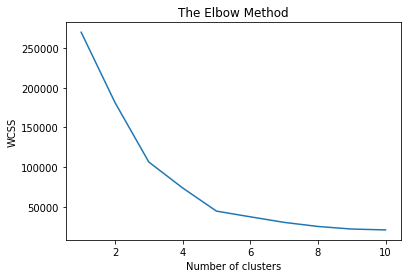

In [28]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying K-Means to the dataset

In [29]:
kmeans = KMeans(n_clusters=5, **kmeans_params)

In [40]:
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

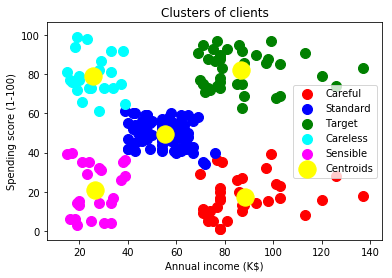

In [52]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual income (K$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()